Insersión directa de gráficas en HTML usando Jinja2
===

* *15 min* | Última modificación: Marzo 31, 2020.

## Data
(Igual al tutorial anterior)

In [1]:
import pandas as pd

data = [
    [45939, 21574, 2876, 1815, 1646, 89, 555],
    [60423, 29990, 4708, 2568, 2366, 1411, 733],
    [64721, 32510, 5230, 2695, 2526, 1546, 773],
    [68484, 35218, 6662, 2845, 2691, 1663, 836],
    [71799, 37598, 6856, 3000, 2868, 1769, 911],
    [76036, 40341, 8220, 3145, 3054, 1905, 1008],
    [79831, 43173, 9053, 3338, 3224, 2005, 1076],
]

data = pd.DataFrame(
    data=data,
    index=[1951, 1956, 1957, 1958, 1959, 1960, 1961],
    columns=["N.Amer", "Europe", "Asia", "S.Amer", "Oceania", "Africa", "Mid.Amer"],
)

data

,N.Amer,Europe,Asia,S.Amer,Oceania,Africa,Mid.Amer
1951,45939,21574,2876,1815,1646,89,555
1956,60423,29990,4708,2568,2366,1411,733
1957,64721,32510,5230,2695,2526,1546,773
1958,68484,35218,6662,2845,2691,1663,836
1959,71799,37598,6856,3000,2868,1769,911
1960,76036,40341,8220,3145,3054,1905,1008
1961,79831,43173,9053,3338,3224,2005,1076


## Generación de las figuras

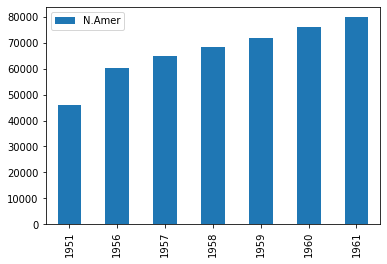

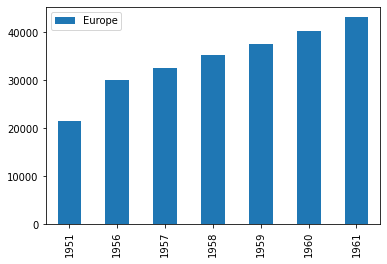

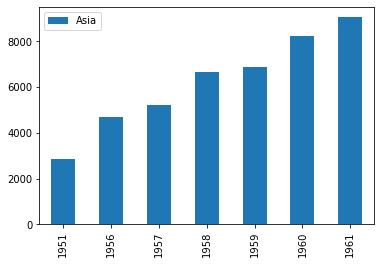

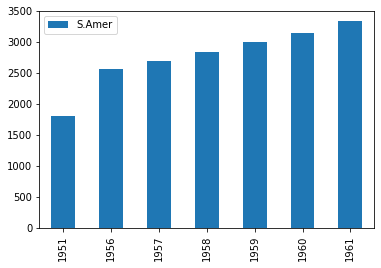

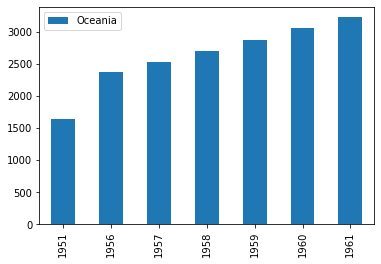

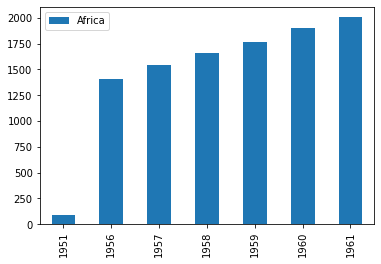

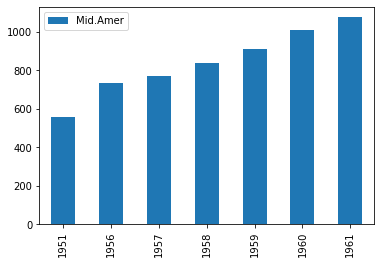

In [2]:
import io, base64
from flask import Markup

images = {}
for col in data.columns:
    img = io.BytesIO()
    data.plot.bar(y=col).get_figure().savefig(img, format='png');
    img.seek(0)
    image_decode = base64.b64encode(img.getvalue()).decode()
    images[col] = Markup('<img src="data:image/png;base64,{}">'.format(image_decode))


## Plantilla para la página web

In [3]:
!mkdir -p templates

In [4]:
%%writefile templates/index.html

<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <title>Telephones</title>    
    
    <style>
    
        body {
          font-family: Arial, Helvetica, sans-serif;
          padding-left: 10px;
        }
        
        header {
            font-size: 20px;
        }
        
        nav {
          float: left;
          width: 20%;
          height: 150px;
          background: #eeeeee;
          padding: 20px;
        }
        
        .seltext {
            font-weight: bold;
        }
        
        .auxtext {
            font-size: 14px;
            color: #807F7F;
        }
    
    </style>
    
  </head>
  <body>
    
    <header>
      <h2>Telephones by region</h2>
    </header>
    
    <nav style="border:1px solid #BEBDBD; border-width:2px;">
      <p class="seltext">Region:</p>
      <select id="region" name="region"  onchange="selectPlot()">

        {% for region in region_names %}
            <option value="{{ region }}">{{ region }}</option>
        {% endfor %}
    
      </select>
      <br>
      <hr>
      <p class="auxtext"> Data from AT&T (1961) The World's Telephones. </p>
    </nav>
       
    <div>
    
      {% for region_name in region_names %}
        {% if region_name == region_names[0] %}
          <div class="myImage" id="{{ region_name }}" style="display:block"> {{ images[region_name] }} </div>  
        {% else %}
          <div class="myImage" id="{{ region_name }}" style="display:none">  {{ images[region_name] }} </div>  
        {% endif %}
      {% endfor %}

    </div>
        
    <script>
      function selectPlot() {
        var region = document.getElementById("region").value;
        var images = document.getElementsByClassName("myImage");
        for (var i = 0; i < images.length; i++) {
          if (images[i].id == region) {
            images[i].style.display = "block"
          }else{
            images[i].style.display = "none"
          }
        }
      }
    </script>
  </body>
</html>

Overwriting templates/index.html


## Generación de la página

In [5]:
from jinja2 import Template

str = open("templates/index.html", "r").read()
template = Template(str)
str = template.render(region_names=data.columns, images=images)
open("index.html", "w").write(str);